# 3.c Model Development Sliding window (Open)

In [116]:
import numpy as np
import math
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import boto3 
import io  
from sagemaker import get_execution_role
role = get_execution_role()
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings("ignore")
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
# Libtune to tune model, get different metric scores
from sklearn import metrics
# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
)
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [117]:
session = boto3.Session()

In [118]:
role

'arn:aws:iam::190183093544:role/service-role/AmazonSageMaker-ExecutionRole-20220602T141236'

In [119]:
bucket='data-use-case-btc-prediction'  
file_key = 'X_train.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
X_train = np.load(io.BytesIO(obj['Body'].read()))  

In [120]:
bucket='data-use-case-btc-prediction'  
file_key = 'y_train.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
y_train = np.load(io.BytesIO(obj['Body'].read())) 

In [121]:
bucket='data-use-case-btc-prediction'  
file_key = 'X_test.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
X_test = np.load(io.BytesIO(obj['Body'].read())) 

In [122]:
bucket='data-use-case-btc-prediction'  
file_key = 'y_test.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
y_test = np.load(io.BytesIO(obj['Body'].read())) 

In [123]:
bucket='data-use-case-btc-prediction'  
file_key = 'X_val.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
X_val = np.load(io.BytesIO(obj['Body'].read())) 

In [124]:
bucket='data-use-case-btc-prediction'  
file_key = 'y_val.npy' 
  
s3_client = boto3.client('s3')  
obj = s3_client.get_object(Bucket=bucket, Key=file_key)  
y_val = np.load(io.BytesIO(obj['Body'].read())) 

In [125]:
scaler = MinMaxScaler()
# transform data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)
X_val = scaler.fit_transform(X_val)
y_val = scaler.fit_transform(y_val)

### Building the linear regression model

In [126]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

LinearRegression()

### Defining functions to compute metrics

In [127]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [128]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, X_train, y_train)
lin_reg_model_perf_train

Training Performance:


RMSE      MAE  R-squared  Adj. R-squared      MAPE
0  0.022972  0.00907   0.996077        0.996016  0.530392

In [129]:
print("Test Performance:")
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, X_test, y_test)
lin_reg_model_perf_test

Test Performance:


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.031831  0.013904   0.994205        0.993989  0.782817

In [130]:
X_train.shape

(1949, 30)

In [131]:
y_train.shape

(1949, 1)

In [132]:
preds = lin_reg_model.predict(X_test)
rms=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(preds)),2)))
rms

0.015592825748117883

### Performace Visualization on Test Set

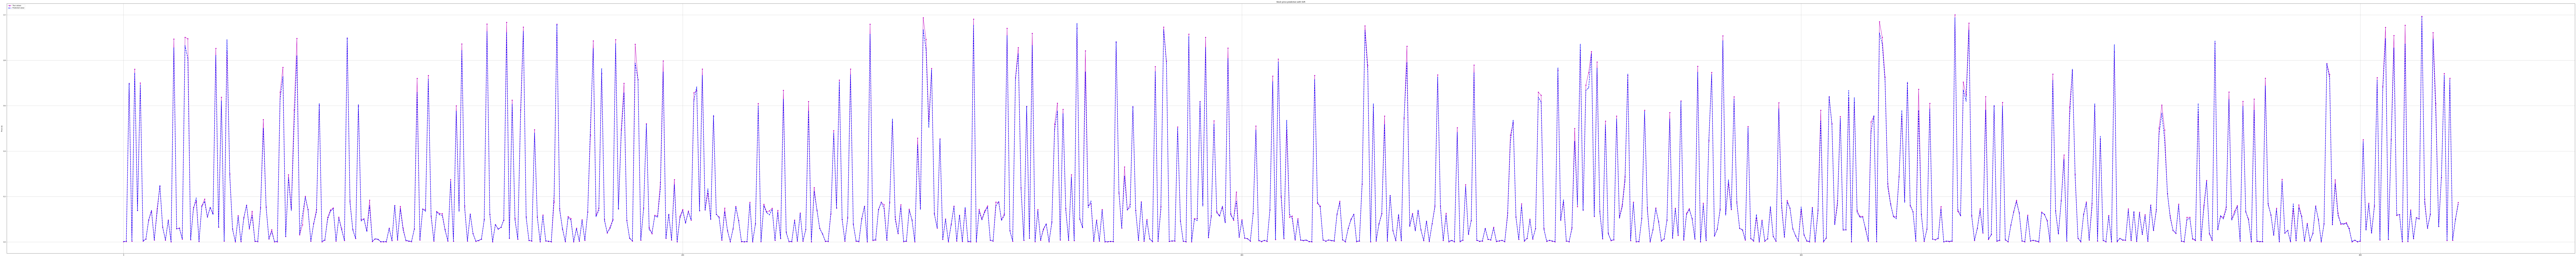

In [133]:
##Perform visualization.
ln_x_test = range(len(X_test))
y_predict = lin_reg_model.predict(X_test)
#Set the canvas.
plt.figure(figsize=(300,30))
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'm-o', lw=2, label=u'True values')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'b--+', lw = 3, label=u'Predicted value')
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Stock price prediction with SVR")
plt.ylabel('Price ($)')
plt.show()

### Using grid search to identify a better model

In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import RidgeCV, LassoCV, LinearRegression, ElasticNet
from sklearn.svm import SVR               

In [135]:
#Build a model.
'''
  'kernel': kernel function
  'C': SVR regularization factor
  'gamma': 'rbf', 'poly' and 'sigmoid' kernel function coefficient, which affects the model performance
'''
parameters = {
   'kernel': ['linear', 'rbf'],
   'C': [0.1, 0.5,0.9,1,5],
   'gamma': [0.001,0.01,0.1,1]
}

#Use grid search and perform cross validation.
model = GridSearchCV(SVR(), param_grid=parameters, cv=3)
model.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'C': [0.1, 0.5, 0.9, 1, 5],
                         'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [136]:
print("Training Performance:")
svr_model_perf_train = model_performance_regression(model, X_train, y_train)
svr_model_perf_train

Training Performance:


RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.085436  0.081718   0.945739         0.94489  25.689062

In [137]:
print("Testing Performance:")
svr_model_perf_train = model_performance_regression(model, X_test, y_test)
svr_model_perf_train

Testing Performance:


RMSE       MAE  R-squared  Adj. R-squared       MAPE
0  0.08977  0.082754   0.953907        0.952189  27.669265

### Performace Visualization on Test Set

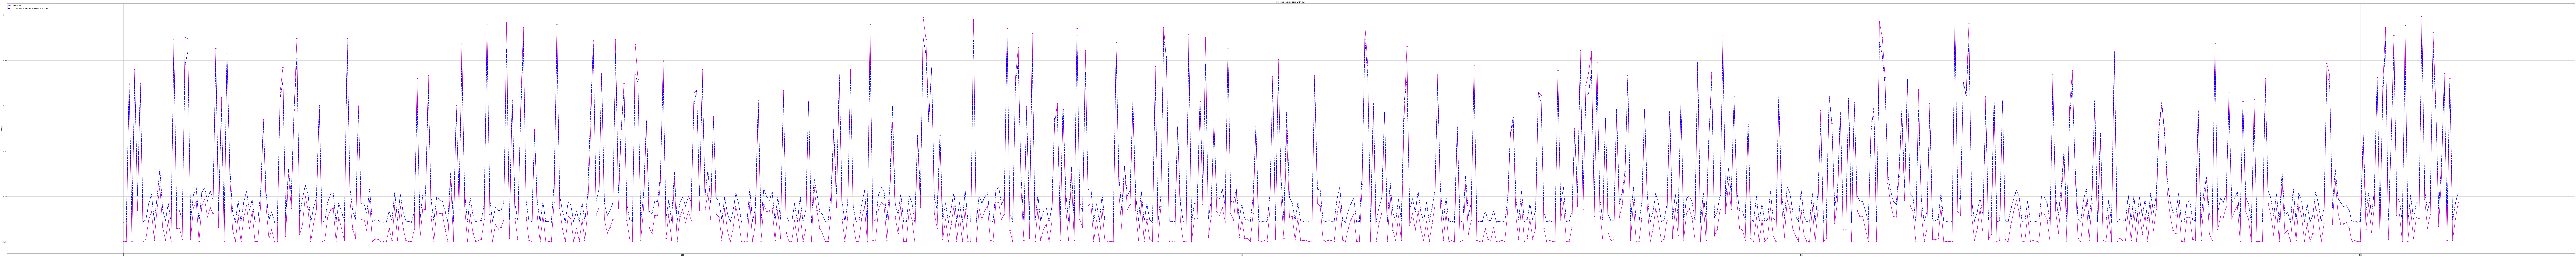

In [138]:
##Perform visualization.
ln_x_test = range(len(X_test))
y_predict = model.predict(X_test)
#Set the canvas.
plt.figure(figsize=(300,30))
#Draw with a red solid line.
plt.plot (ln_x_test, y_test, 'm-o', lw=2, label=u'True values')
#Draw with a green solid line.
plt.plot (ln_x_test, y_predict, 'b--+', lw = 3, label=u'Predicted value with the SVR algorithm, $R^2$=%.3f' % (model.best_score_))
#Display in a diagram.
plt.legend(loc ='upper left')
plt.grid(True)
plt.title(u"Stock price prediction with SVR")
plt.ylabel('Price ($)')
plt.show()

In [139]:
#making a variable to perform predictions and replace original values
X_val_predict=X_val

### Function to predict and replace values in the 30 day validation set

In [140]:
def prediction_replace(value):
    """function to predict and replace validation set"""
    j=0
    i=0
    f=0
    preds=[]
    #for f in range(len(value)-1):
    for i in range(len(value)-1):
        pred_val=lin_reg_model.predict(value[f:f+1])
        preds.append(pred_val)
        value[i+1][29-j]=preds[i]
        #value[i][len(value[i,])-1-j]=pred_val
        j+=1
        f+=1
        y_val_predict=preds
    return y_val_predict
 
    
            
"""        
def prediction(value):
    pred_values=[]
    for i in range(len(value)):
        pred_val=lin_reg_model.predict(value[i:i+1])
        pred_values.append(pred_val)
      
    return pred_values
    """

'        \ndef prediction(value):\n    pred_values=[]\n    for i in range(len(value)):\n        pred_val=lin_reg_model.predict(value[i:i+1])\n        pred_values.append(pred_val)\n      \n    return pred_values\n    '

### Variable stores Our predicted values 

In [141]:
y_val_predict=prediction_replace(X_val_predict)

In [142]:
#transforming variable to a single array
y_val_predict=np.concatenate(y_val_predict)

### Checking performance

In [143]:
print("Validation Performance:")
linear_regression_perf_val = model_performance_regression(lin_reg_model, X_val_predict, y_val)
linear_regression_perf_val

Validation Performance:


RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.177544  0.127203   0.918473         3.36427  7.312321

### Inverse transforming values to original values

In [144]:
true_y_predict=scaler.inverse_transform(y_val_predict)

In [145]:
true_y_predict=pd.DataFrame(true_y_predict,columns=['price'])

In [146]:
true_y_predict

price
0   31482.775876
1   30834.076116
2   31179.426269
3   29455.477471
4   28453.259811
5   28840.219248
6   30436.576984
7   31240.114493
8   29685.833284
9   29828.615792
10  28647.824942
11  27875.866630
12  25804.746533
13  21559.804362
14  22997.243073
15  22089.609865
16  19626.893684
17  20492.204954
18  20343.257872
19  20702.812885
20  18978.538325
21  19819.503267
22  20327.486963
23  21031.796488
24  21162.152308
25  22066.151219
26  21023.711303
27  20104.192129
28  19545.779447

In [147]:
true_y=scaler.inverse_transform(y_val)

In [148]:
true_y=pd.DataFrame(true_y,columns=['price'])

In [149]:
true_y

price
0   29794.890625
1   30467.806641
2   29706.138672
3   29835.117188
4   29910.283203
5   31371.742188
6   31151.480469
7   30215.279297
8   30110.330078
9   29084.666016
10  28373.513672
11  26737.578125
12  22487.986328
13  22196.730469
14  22576.304688
15  20385.718750
16  20473.425781
17  19010.902344
18  20553.371094
19  20594.294922
20  20719.414063
21  19986.607422
22  21084.648438
23  21233.609375
24  21496.494141
25  21028.238281
26  20731.544922
27  20281.169922
28  20108.312500
29  19820.470703

### Visualizing perfromance on validation set

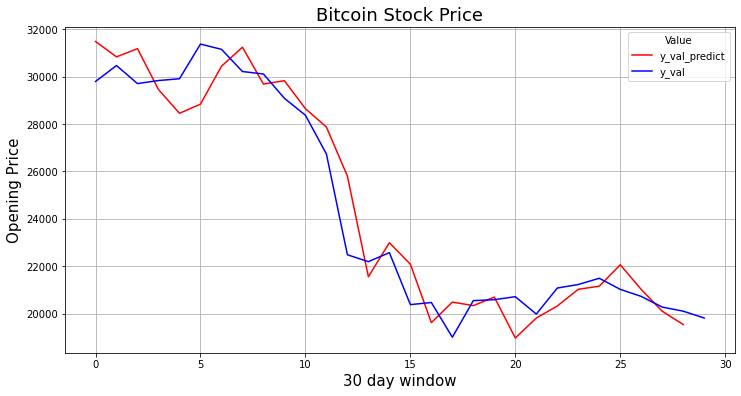

In [150]:
plt.figure(figsize=(12,6))
plt.plot(true_y_predict['price'], label = 'y_val_predict',color='red')
plt.plot(true_y['price'],label = "y_val", color = 'blue')
plt.legend(title='Value')
plt.ylabel("Opening Price", fontsize=15)
plt.xlabel("30 day window", fontsize=15)
plt.title("Bitcoin Stock Price", fontsize=18)
#display plot
plt.grid(True)
plt.show()

### Checking difference in prediction

In [151]:
#value of of difference in prediction
drift=true_y-true_y_predict

In [152]:
#percentage of difference in prediction
drift_precentage=((true_y-true_y_predict)/true_y)*100

In [153]:
drift_precentage

price
0   -5.665016
1   -1.202152
2   -4.959539
3    1.272459
4    4.871313
5    8.069437
6    2.294926
7   -3.391778
8    1.409805
9   -2.557876
10  -0.966786
11  -4.257261
12 -14.749032
13   2.869459
14  -1.864514
15  -8.358259
16   4.134785
17  -7.791858
18   1.022281
19  -0.526932
20   8.402148
21   0.836081
22   3.591056
23   0.950441
24   1.555332
25  -4.935805
26  -1.409284
27   0.872621
28   2.797515
29        NaN

### Visulaizing the difference

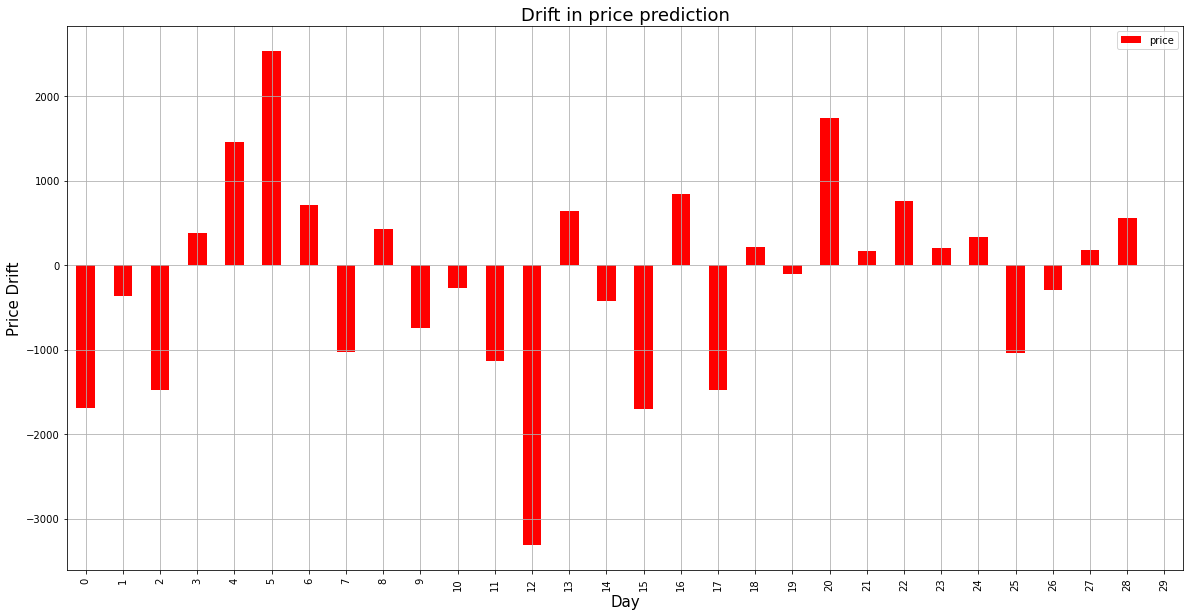

In [154]:
#difference in value
drift.plot(kind="bar",color='red',figsize=(20,10) )
plt.ylabel("Price Drift", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.title("Drift in price prediction", fontsize=18)
plt.grid(True)

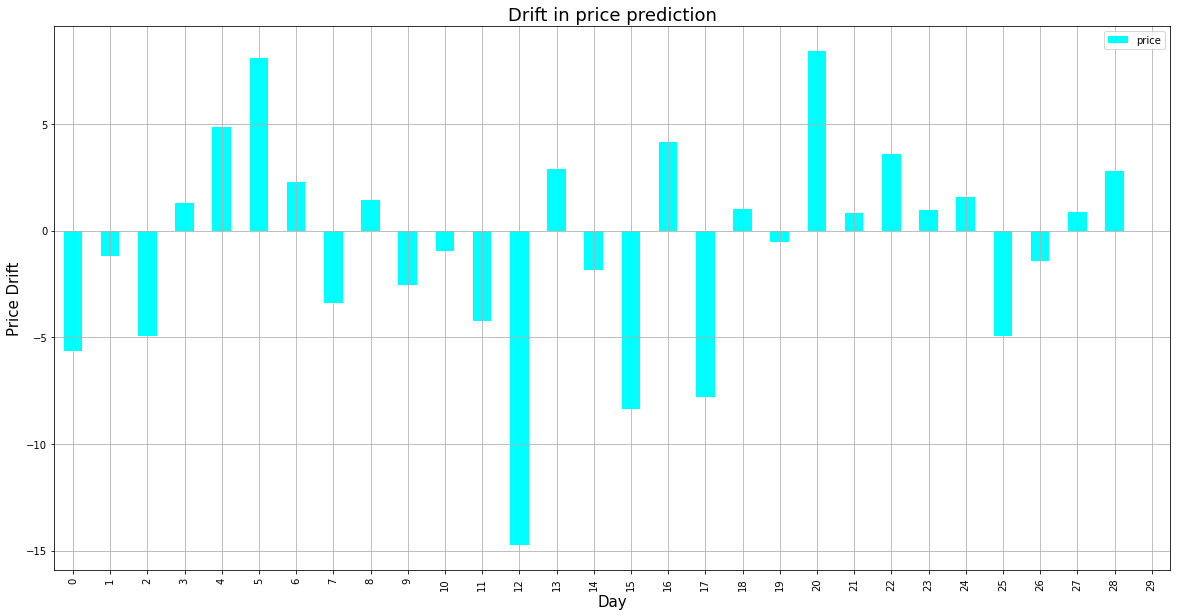

In [155]:
#difference in percentage
drift_precentage.plot(kind="bar",color='cyan',figsize=(20,10) )
plt.ylabel("Price Drift", fontsize=15)
plt.xlabel("Day", fontsize=15)
plt.title("Drift in price prediction", fontsize=18)
plt.grid(True)